In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
# Load the dataset
df = pd.read_csv("newdata.csv")

C:\Users\lahir\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lahir\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lahir\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lahir\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

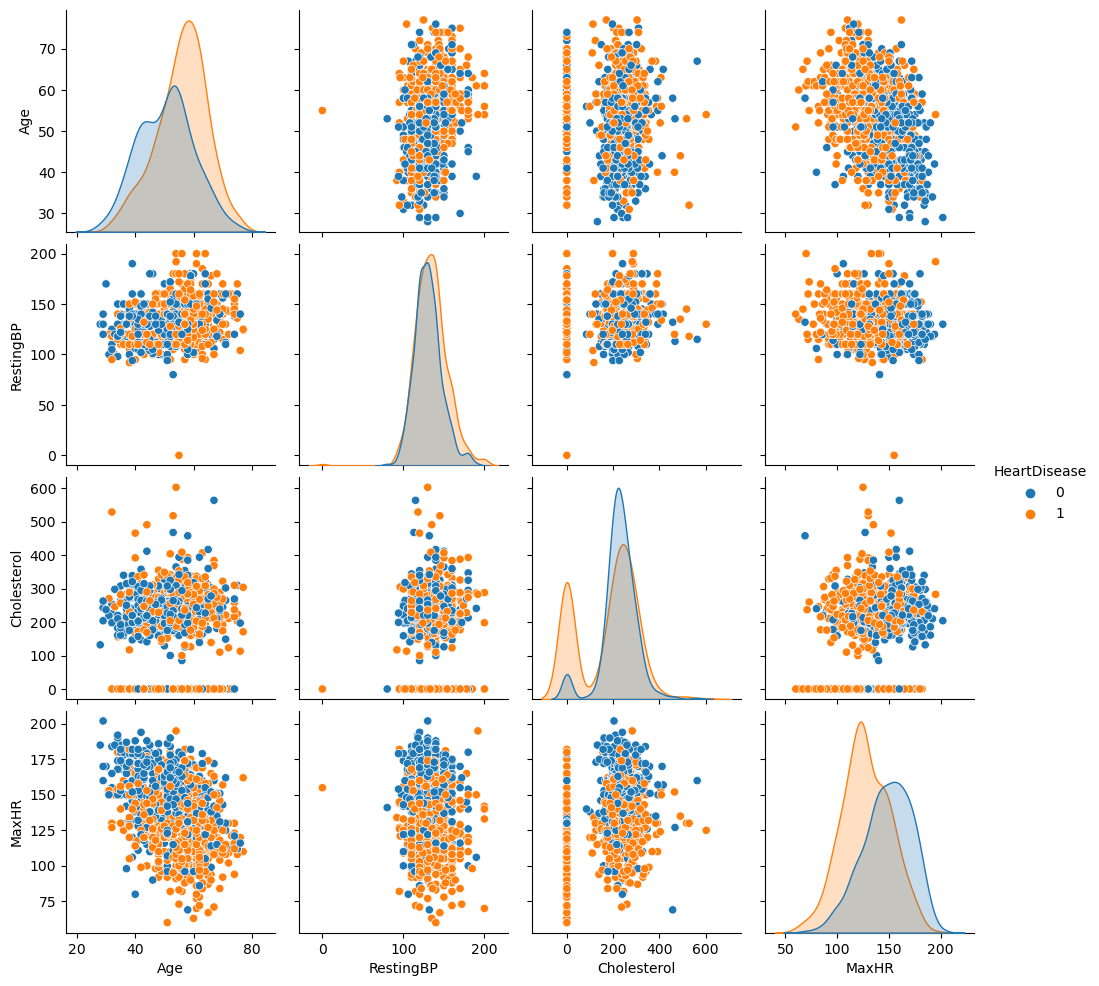

In [67]:
# Describe the distributions of five important variables
important_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']
sns.pairplot(df[important_variables], hue='HeartDisease')
plt.show()

In [68]:
# Check for null values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [69]:
# Treat null values for numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Treat null values for categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# For categorical columns, fill missing values with the most frequent value
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [70]:
balance = df['HeartDisease'].value_counts(normalize=True)
print(balance)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [71]:
# Since there are categorical variables, encoding is necessary
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])


In [72]:
scaler = StandardScaler()
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])


In [73]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Model 1: Logistic Regression with hyperparameter tuning
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(X_train, y_train)

# Model 2: Random Forest with hyperparameter tuning
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10, 15]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)

# Model 3: Support Vector Machine with hyperparameter tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train, y_train)

# 9. Model evaluation
models = {'Logistic Regression': lr_grid.best_estimator_,
          'Random Forest': rf_grid.best_estimator_,
          'Support Vector Machine': svm_grid.best_estimator_}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

[[68  9]
 [17 90]]
Random Forest
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

[[66 11]
 [14 93]]
Support Vector Machine
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        77
           1       0.87      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86

In [75]:
models = {'Logistic Regression': lr_grid.best_estimator_,
          'Random Forest': rf_grid.best_estimator_,
          'Support Vector Machine': svm_grid.best_estimator_}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Explanation of Evaluation Metrics
    print("\nExplanation of Evaluation Metrics:")
    print("- Accuracy measures the overall correctness of the model's predictions.")
    print("- Precision measures the model's ability to avoid false positive predictions.")
    print("- Recall measures the model's ability to identify all positive instances correctly.")
    print("- Classification Report provides a summary of key evaluation metrics for each class.")
    print("- Confusion Matrix visualizes the model's performance.")

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

[[68  9]
 [17 90]]

Explanation of Evaluation Metrics:
- Accuracy measures the overall correctness of the model's predictions.
- Precision measures the model's ability to avoid false positive predictions.
- Recall measures the model's ability to identify all positive instances correctly.
- Classification Report provides a summary of key evaluation metrics for each class.
- Confusion Matrix visualizes the model's performance.
Random Forest
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86   

In [76]:
from sklearn.feature_selection import SelectFromModel

# Feature Selection
# We'll use Random Forest classifier for feature selection
rf_feature_selector = SelectFromModel(rf_grid.best_estimator_)
rf_feature_selector.fit(X_train, y_train)

# Get selected feature indices
selected_feature_indices = rf_feature_selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Subset the dataset with selected features
X_train_selected = rf_feature_selector.transform(X_train)
X_test_selected = rf_feature_selector.transform(X_test)


print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
       'ChestPainType_ASY', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')
